 <font size="20"><p>&hearts;Personal Key Indicators of Heart Disease

 <p></font>

<p>&hearts;<span style = "color: Purple" > <b>AMAL ALKRAIMEEN</b></p> </span>

## About the Dataset


<span style ="color:red">The Heart Disease dataset is a collection of patient medical records that includes various features such as age, sex, blood pressure, cholesterol levels, and whether or not the patient has heart disease.</span>

<span style ="color:green">According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.</span>


Column Descriptions

<span style ="color:blue">
HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).


BMI: Body Mass Index (BMI).


Smoking: Have you smoked at least 100 cigarettes in your entire life?


AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week


Stroke: (Ever told) (you had) a stroke?


PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).


MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).


DiffWalking: Do you have serious difficulty walking or climbing stairs?


Sex: Are you male or female?


AgeCategory: Fourteen-level age category. (then calculated the mean)


Race: Imputed race/ethnicity value.


Diabetic: (Ever told) (you had) diabetes?


PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.


GenHealth: Would you say that in general your health is...


SleepTime: On average, how many hours of sleep do you get in a 24-hour period?


Asthma: (Ever told) (you had) asthma?


KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?


SkinCancer: (Ever told) (you had) skin cancer?
</span>

In [99]:
#Import Libraries
# Import all the tools we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import metrics

In [100]:
df = pd.read_csv(r'C:\Users\user\Desktop\ml project\heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [101]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [102]:
# Check the dimensions of the dataframe
df.shape

(319795, 18)

In [103]:

# Check for data characters mistakes
df.columns
     

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [104]:
# It seems that there is No data characters mistakes!

In [105]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [106]:
# Notice we have 319,795 entries

Check the data type

In [107]:

df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [108]:
# count of values in each feature ...
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [109]:
# Most columns are with object type!

In [110]:
df.HeartDisease.value_counts() # عدد تكرار كل قيمة لمرض القلب
     

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [111]:
# برجعلي الفاليوز بكل فيتشر
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [112]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [113]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [114]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [115]:

df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


<p>&hearts;<b> Check for missing values</p></b>

In [116]:
df.isnull().sum() # we notice there is no null values

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [117]:

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


<b>Exploratory Data Analysis (EDA)</b>

(array([1.72840e+04, 1.72106e+05, 1.00863e+05, 2.33270e+04, 4.88800e+03,
        9.37000e+02, 2.61000e+02, 8.70000e+01, 2.90000e+01, 1.30000e+01]),
 array([12.02 , 20.303, 28.586, 36.869, 45.152, 53.435, 61.718, 70.001,
        78.284, 86.567, 94.85 ]),
 <BarContainer object of 10 artists>)

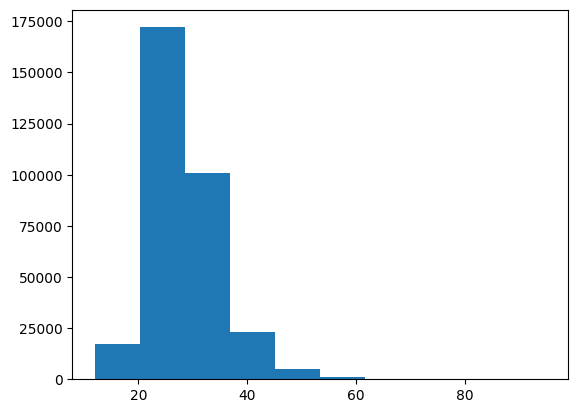

In [118]:
plt.hist(df['BMI'])

(array([131908.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 187887.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

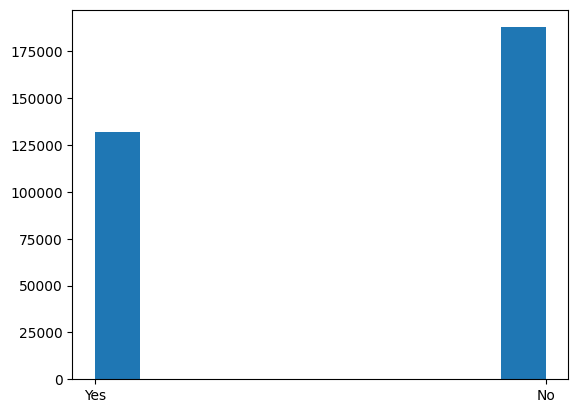

In [119]:

plt.hist(df['Smoking'])

(array([298018.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  21777.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

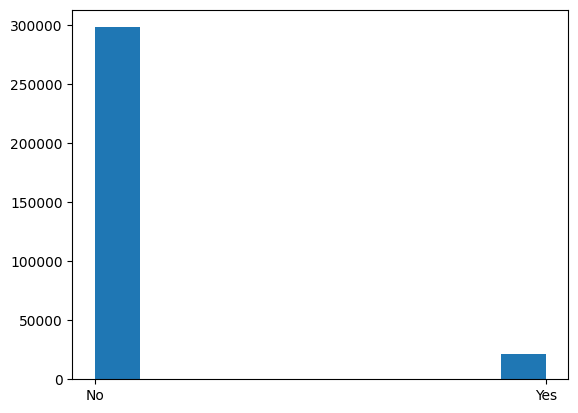

In [120]:
plt.hist(df['AlcoholDrinking'])

(array([251958.,  20691.,   6823.,   5718.,   3589.,   5257.,   3418.,
           761.,   1297.,  20283.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

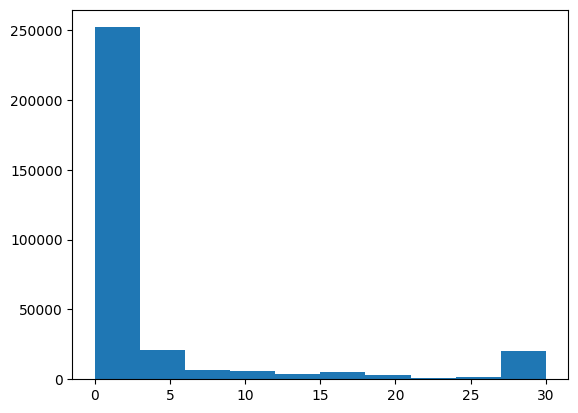

In [121]:
plt.hist(df['PhysicalHealth'])

(array([231187.,  29994.,   8132.,  10799.,   2915.,  10176.,   5663.,
           518.,   2080.,  18331.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

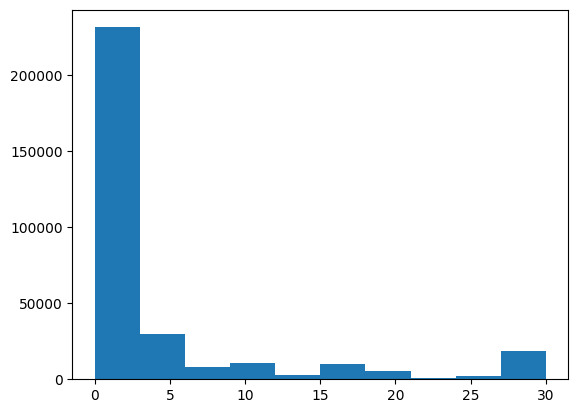

In [122]:
plt.hist(df['MentalHealth'])

In [123]:
#plt.hist(df['DiffWalking'])

(array([167805.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 151990.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

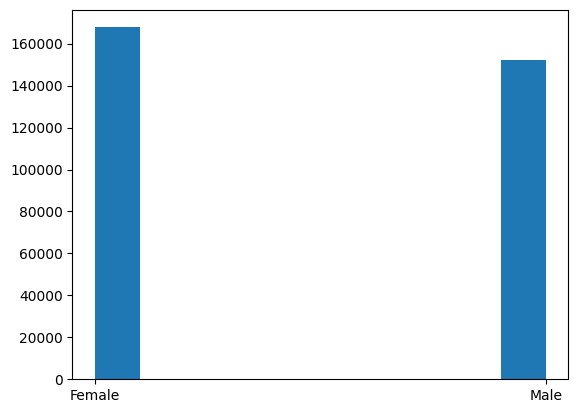

In [124]:
plt.hist(df['Sex'])

(array([245212.,      0.,  22939.,      0.,   8068.,      0.,   5202.,
             0.,  10928.,  27446.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

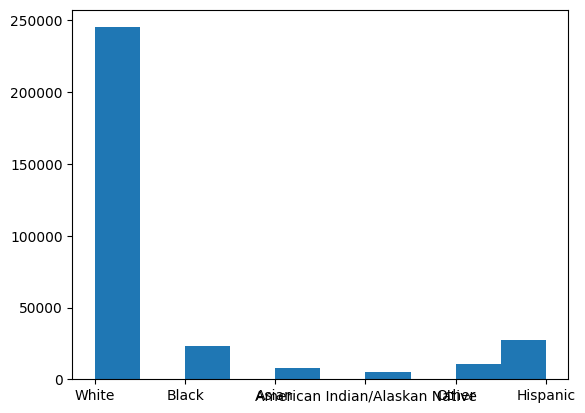

In [125]:
plt.hist(df['Race'])

(array([ 40802.,      0.,      0., 269653.,      0.,      0.,   6781.,
             0.,      0.,   2559.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

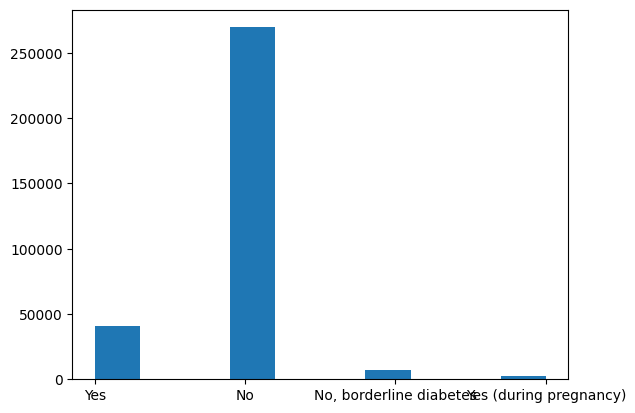

In [126]:
plt.hist(df['Diabetic'], rwidth=20)

(array([247957.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  71838.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

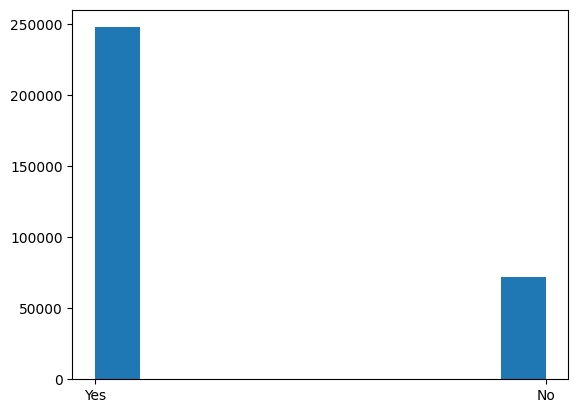

In [127]:
plt.hist(df['PhysicalActivity'])

(array([113858.,      0.,  34677.,      0.,      0.,  93129.,      0.,
         11289.,      0.,  66842.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

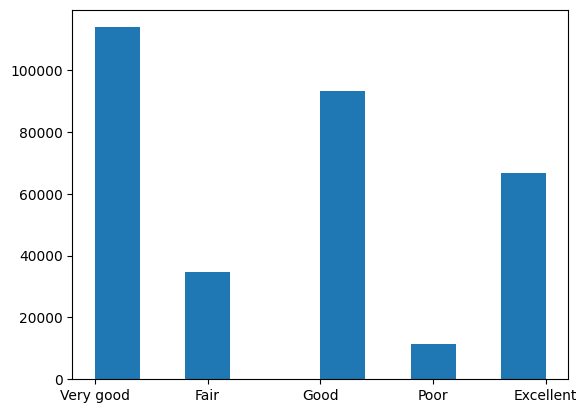

In [128]:
plt.hist(df['GenHealth'])
     

(array([3.33100e+03, 2.69340e+04, 1.64472e+05, 1.21439e+05, 2.62000e+03,
        3.40000e+02, 4.46000e+02, 1.05000e+02, 6.60000e+01, 4.20000e+01]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <BarContainer object of 10 artists>)

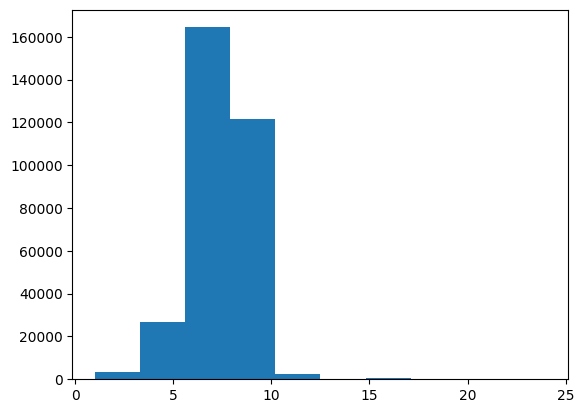

In [129]:
plt.hist(df['SleepTime'])

(array([ 42872.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 276923.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

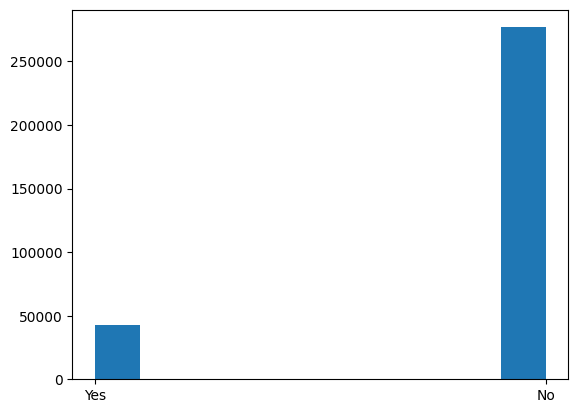

In [130]:
plt.hist(df['Asthma']) 

(array([308016.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  11779.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

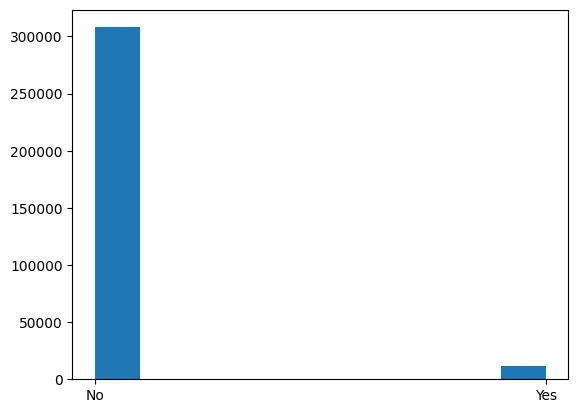

In [131]:

plt.hist(df['KidneyDisease'])

(array([ 29819.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 289976.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

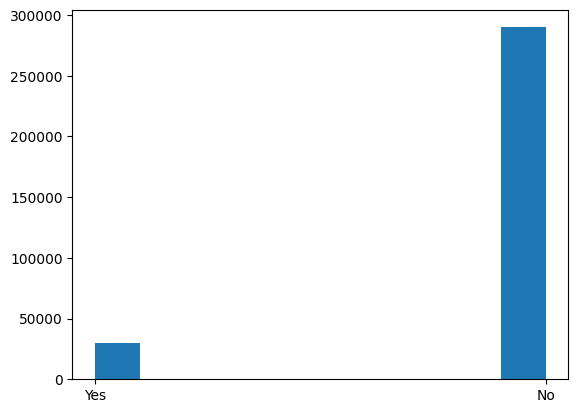

In [132]:
plt.hist(df['SkinCancer'])

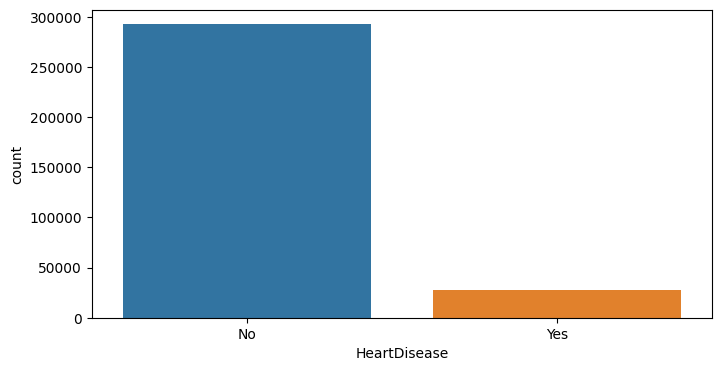

In [133]:

plt.figure(figsize=(8,4))
sns.countplot(x=df["HeartDisease"])
plt.show()

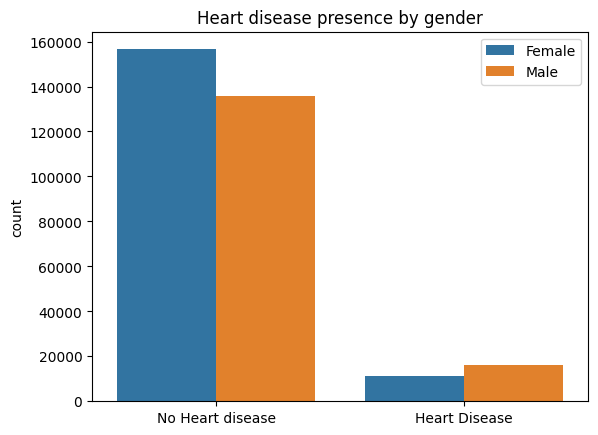

In [134]:
f = sns.countplot(x='HeartDisease', data=df, hue='Sex')
plt.legend(['Female', 'Male'])   # identify defferent categories
f.set_title("Heart disease presence by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

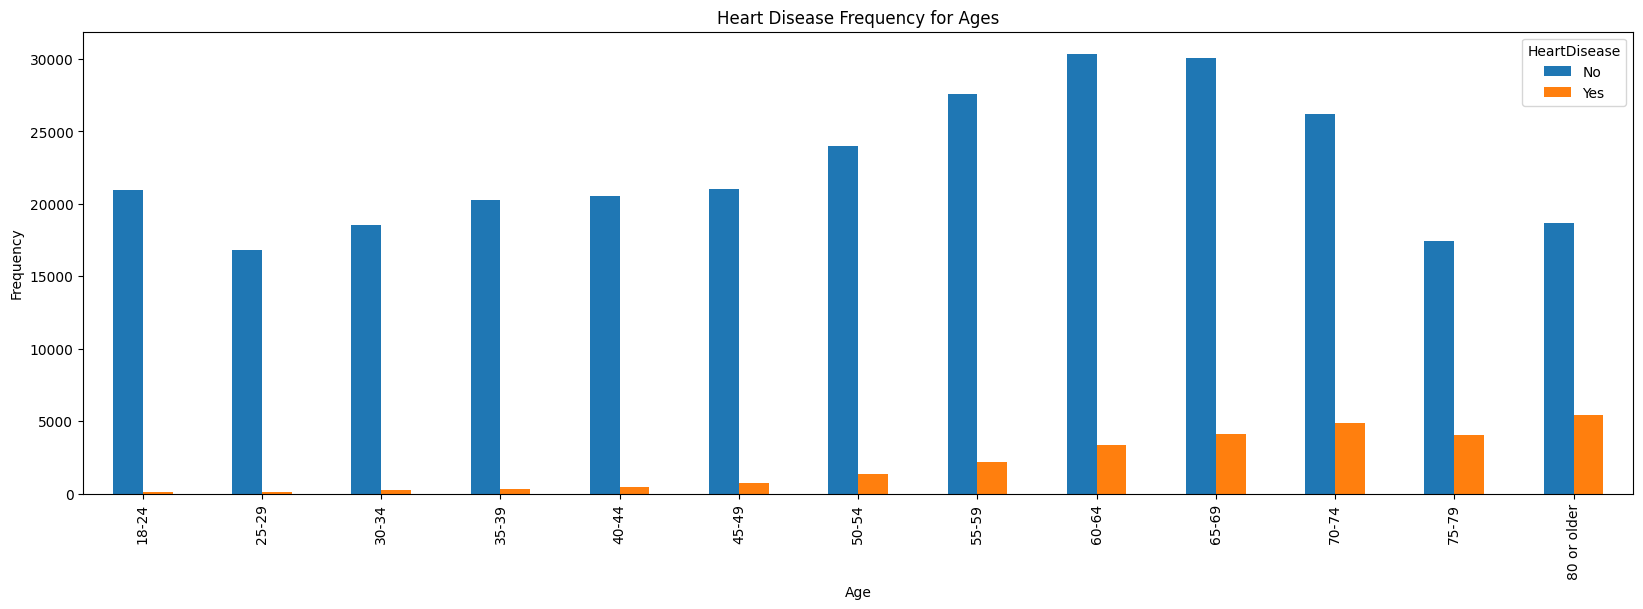

In [135]:
pd.crosstab(df.AgeCategory,df.HeartDisease).plot(kind="bar",figsize=(20,6)) 
#creat croostabulation between age category and heart disease
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png') 
plt.show()

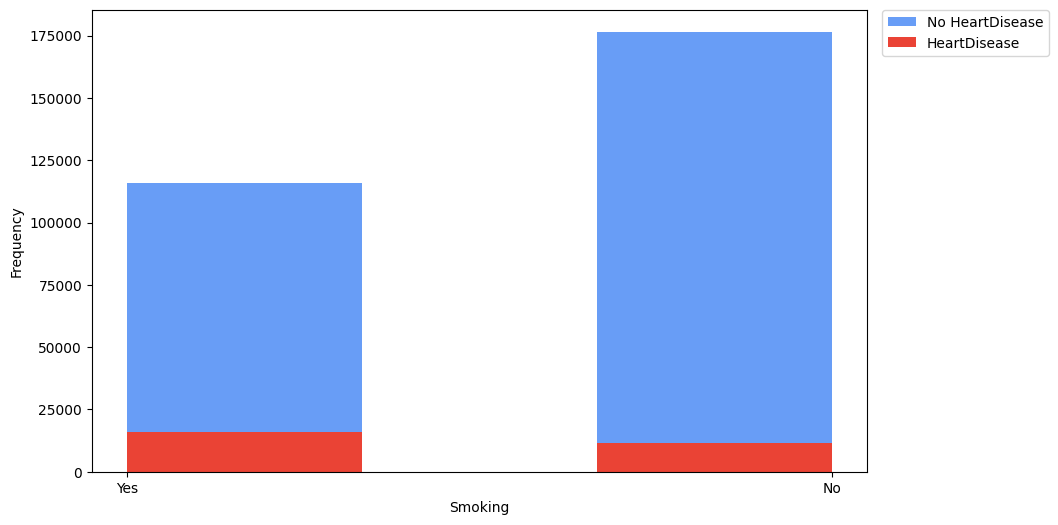

In [136]:

fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


#sns.histplot(data=df, x="BMI", stat="HeartDisease", discrete=True)

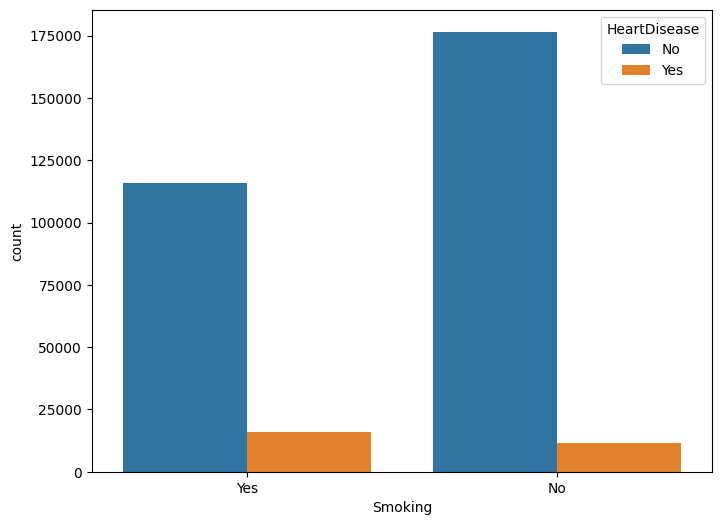

In [137]:

plt.figure(figsize=(8,6))
sns.countplot(x='Smoking',hue='HeartDisease',data=df)
plt.show()


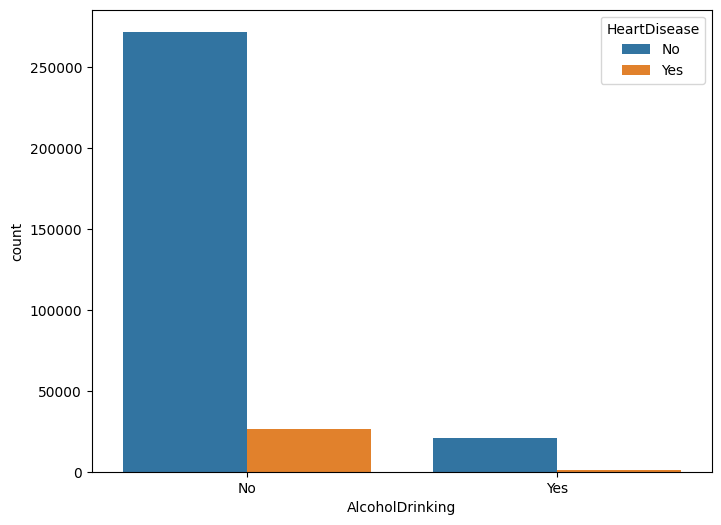

In [138]:
plt.figure(figsize=(8,6))
sns.countplot(x='AlcoholDrinking',hue='HeartDisease',data=df)
plt.show()

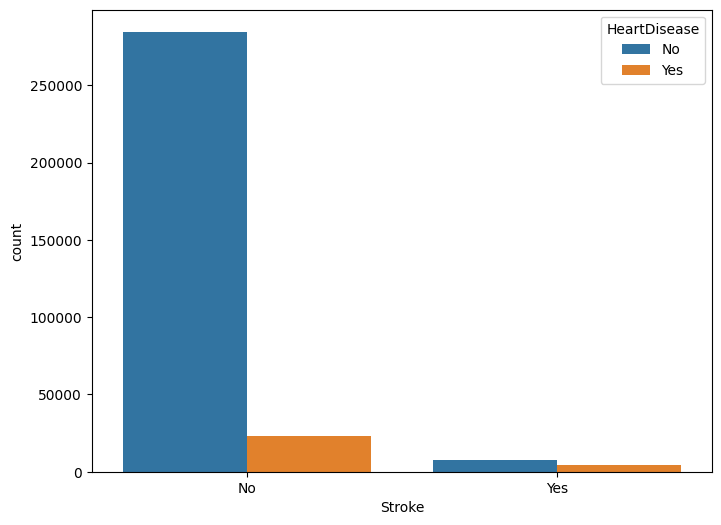

In [139]:

plt.figure(figsize=(8,6))
sns.countplot(x='Stroke',hue='HeartDisease',data=df)
plt.show()

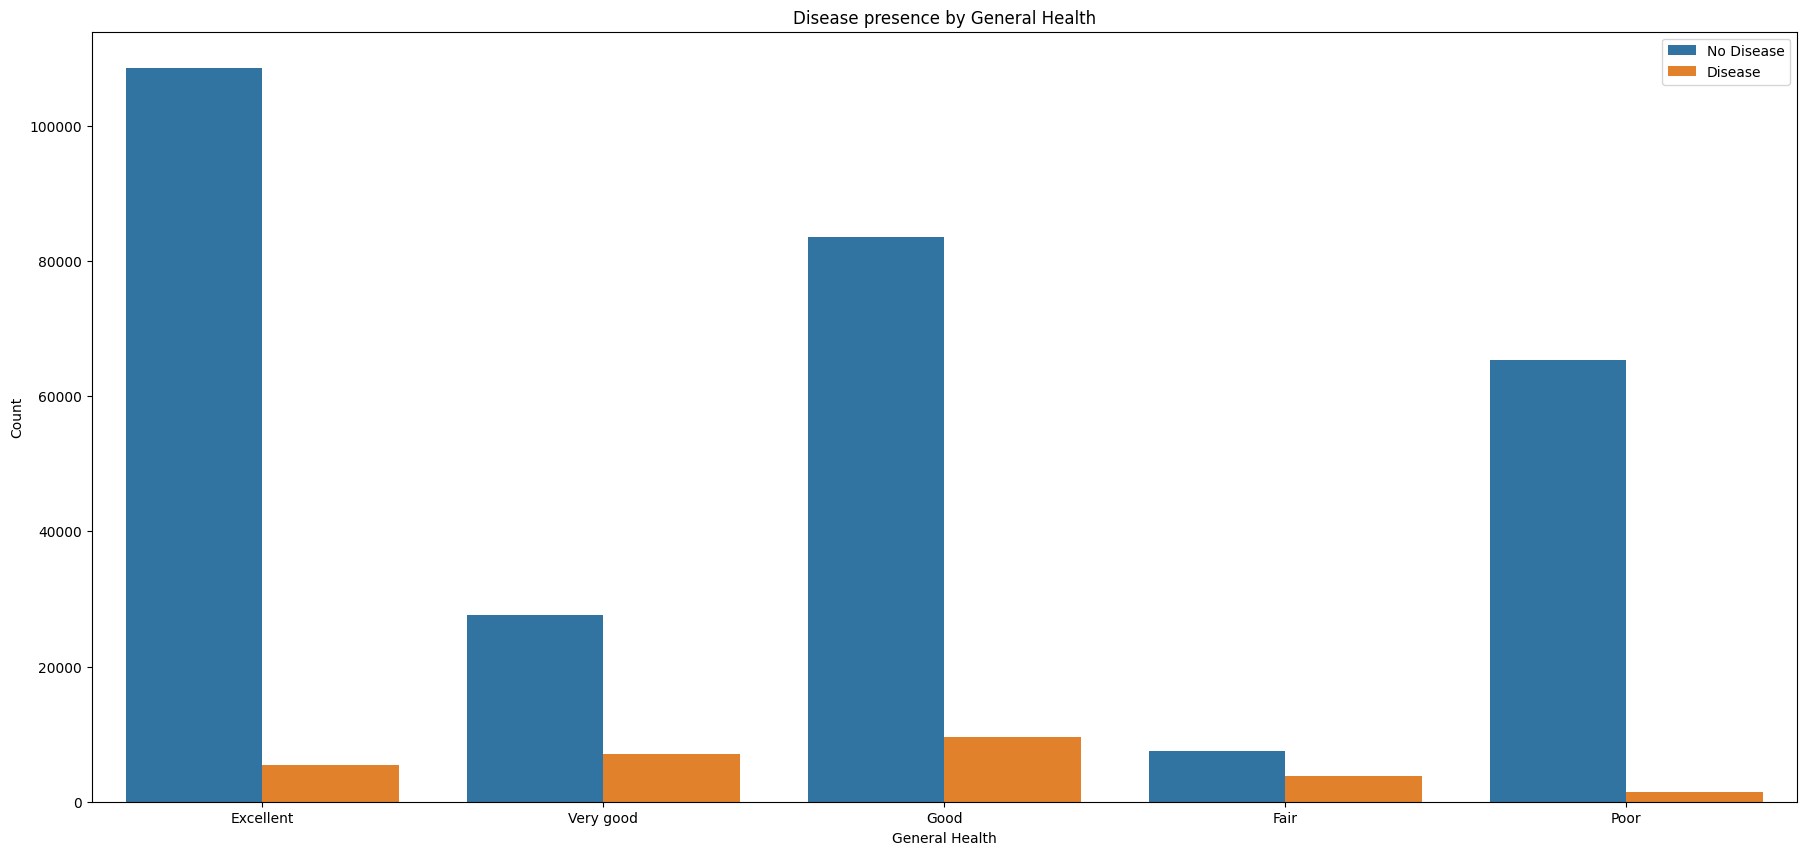

In [140]:
plt.figure(figsize=(22,10))
f = sns.countplot(x='GenHealth', data=df, hue='HeartDisease')
f.set_xticklabels(['Excellent', 'Very good', 'Good', 'Fair','Poor']);
f.set_title('Disease presence by General Health')

plt.ylabel('Count')
plt.xlabel('General Health')
plt.legend(['No Disease', 'Disease']);

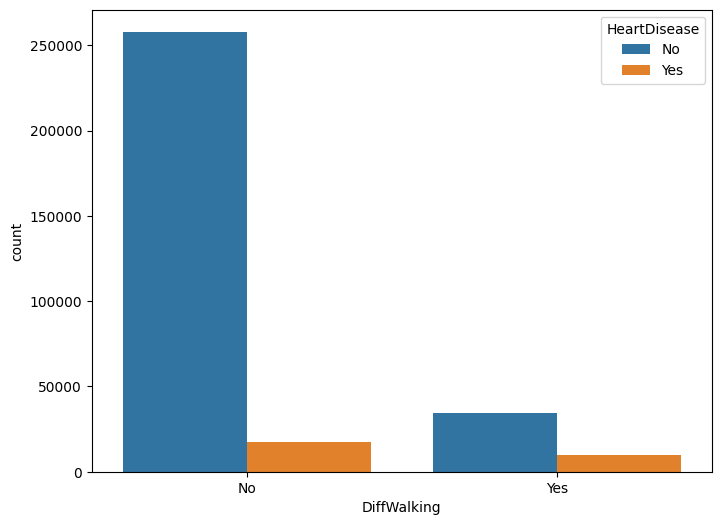

In [141]:
plt.figure(figsize=(8,6))
sns.countplot(x='DiffWalking',hue='HeartDisease',data=df)
plt.show()

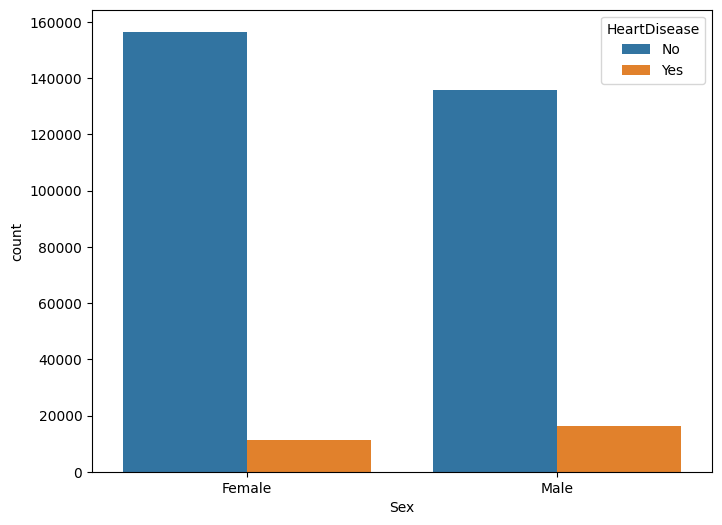

In [142]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex',hue='HeartDisease',data=df)
plt.show()

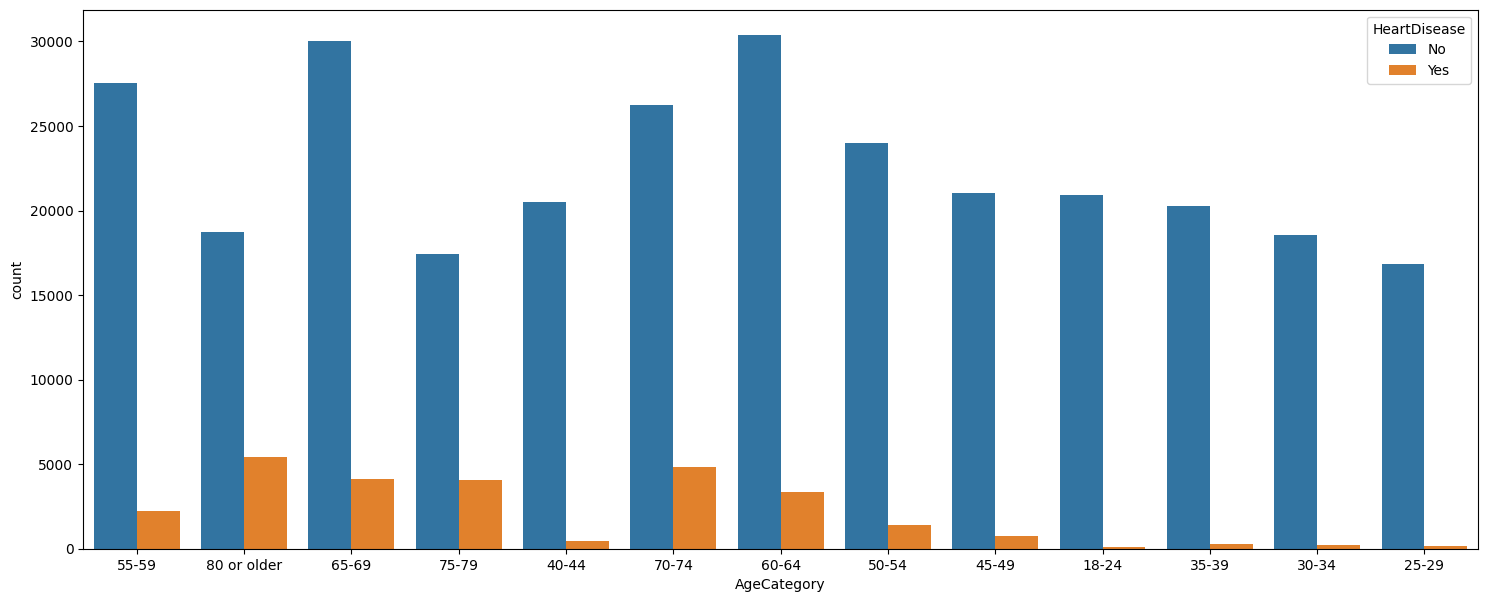

In [143]:

plt.figure(figsize=(18,7))
sns.countplot(x='AgeCategory',hue='HeartDisease',data=df)  
plt.show()

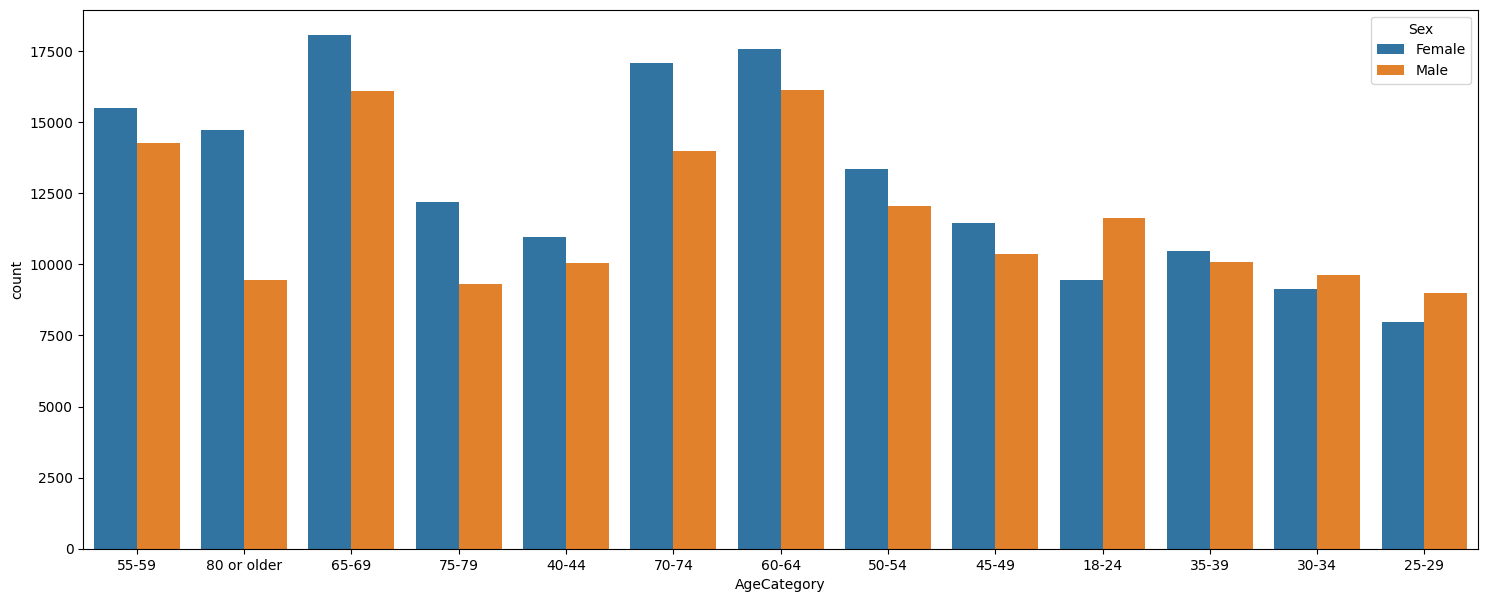

In [144]:

plt.figure(figsize=(18,7))
sns.countplot(x='AgeCategory',hue='Sex',data=df)  
plt.show()

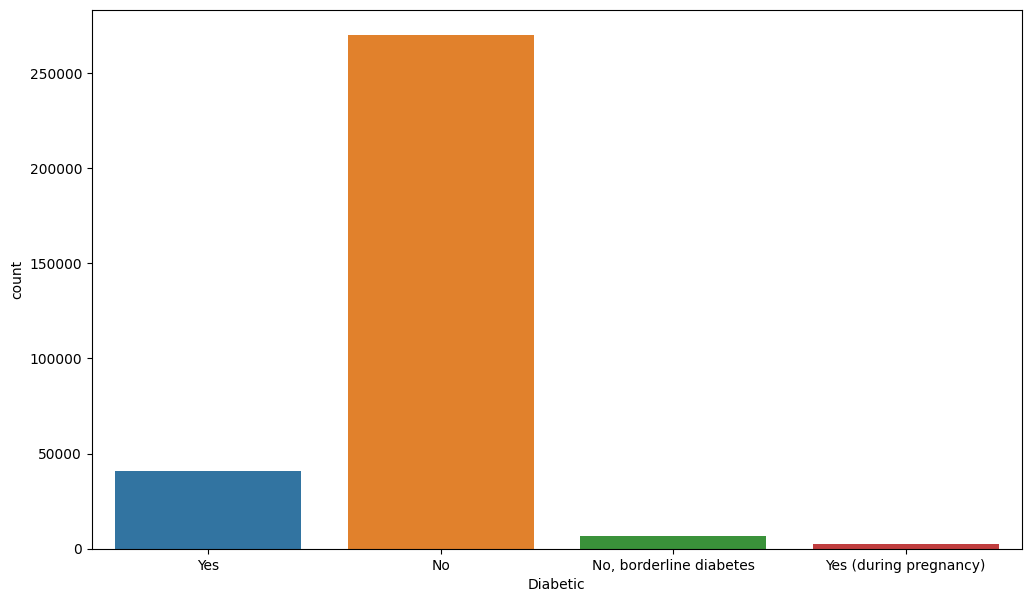

In [145]:
plt.figure(figsize=(12,7))
sns.countplot(x=df["Diabetic"])
plt.show()

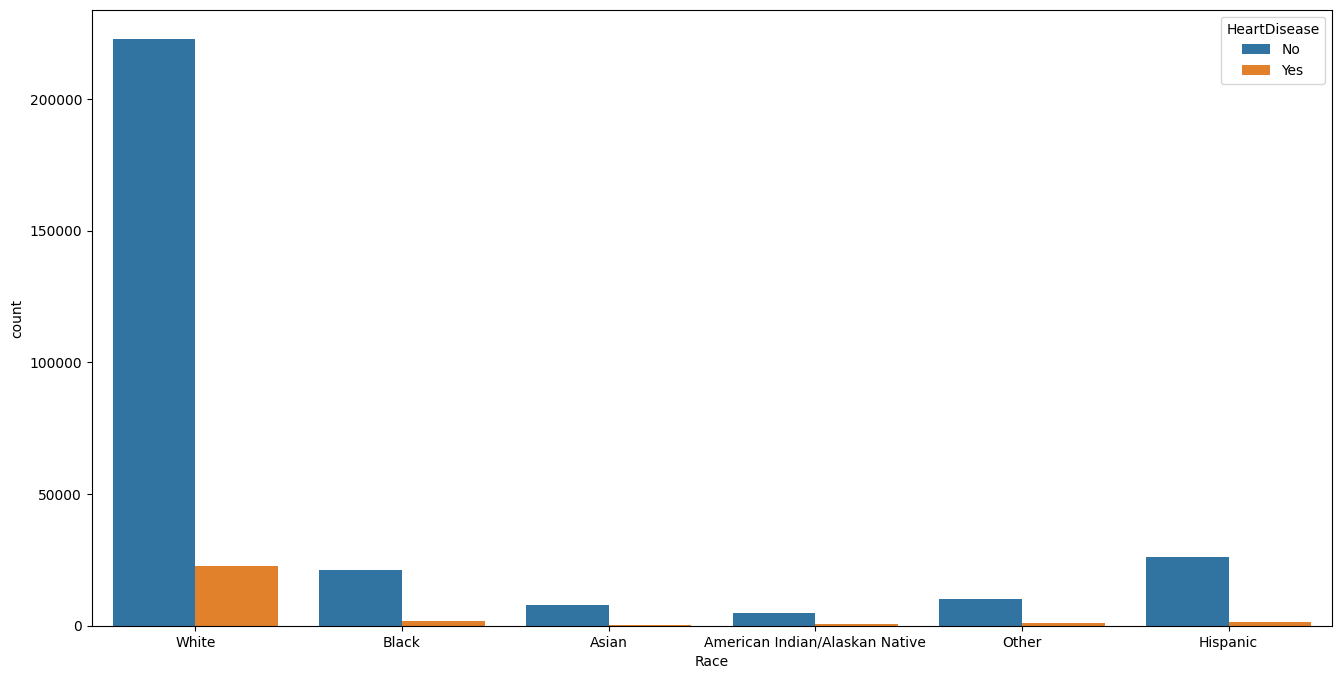

In [146]:
plt.figure(figsize=(16,8))
sns.countplot(x='Race',hue='HeartDisease',data=df)
plt.show()  
     

<Axes: xlabel='SleepTime', ylabel='count'>

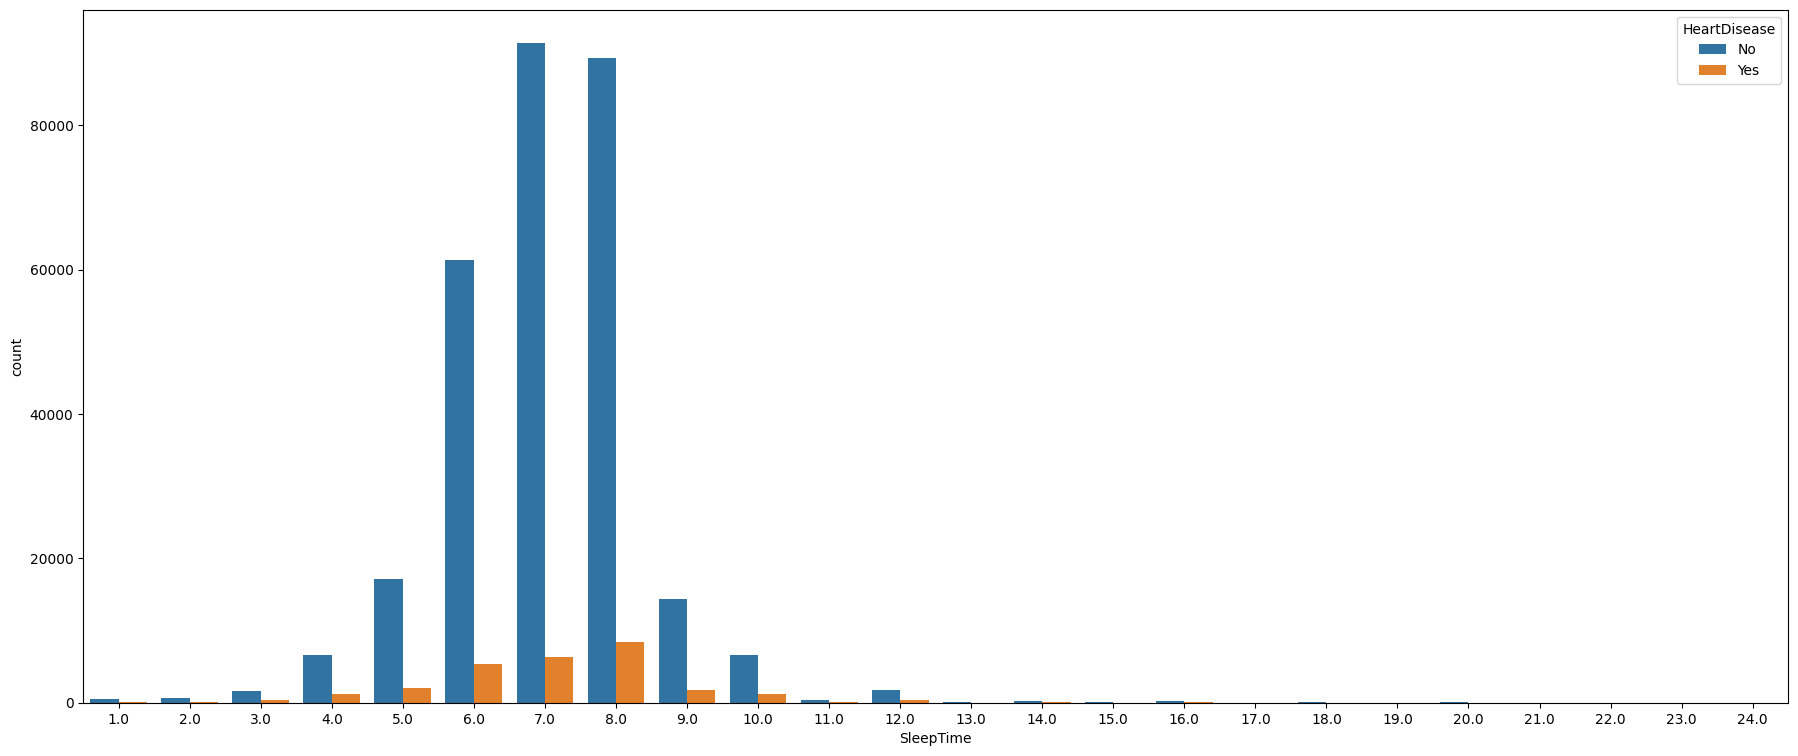

In [147]:
plt.figure(figsize=(22,9))
sns.countplot(data=df, x="SleepTime", hue="HeartDisease")


<Axes: xlabel='Asthma', ylabel='count'>

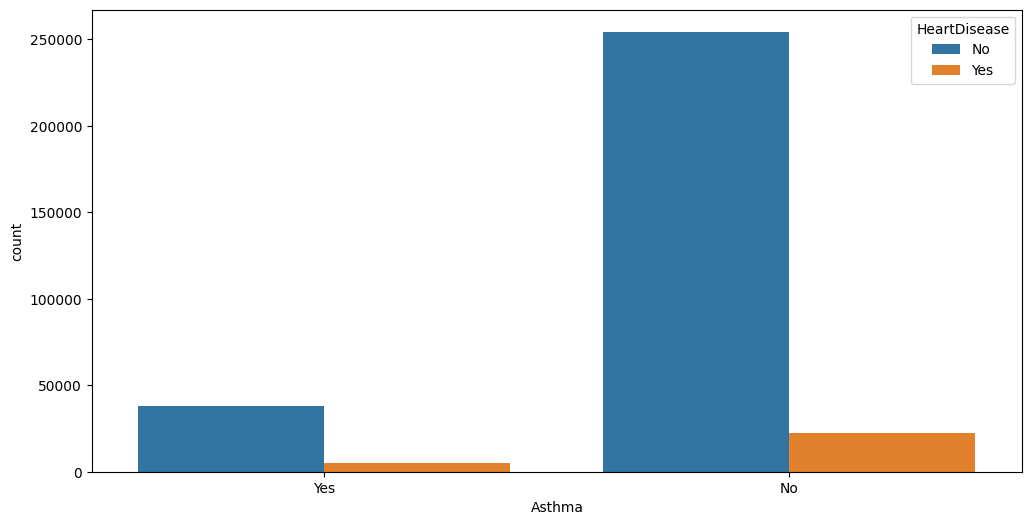

In [148]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Asthma", hue="HeartDisease")

<Axes: xlabel='KidneyDisease', ylabel='count'>

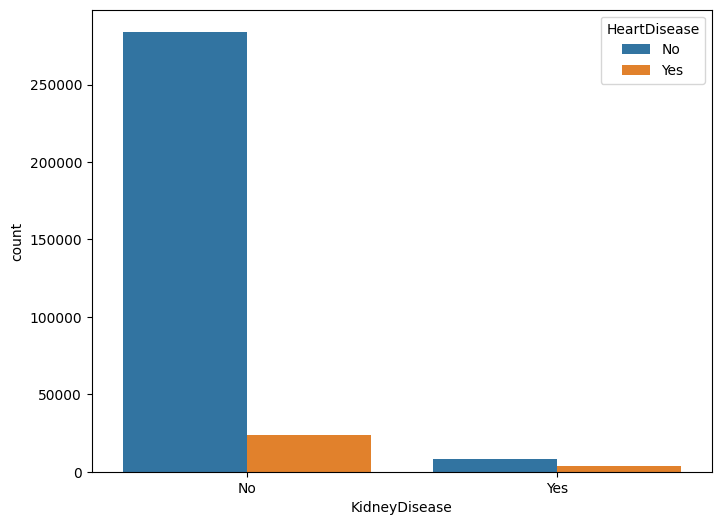

In [149]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="KidneyDisease", hue="HeartDisease")

<Axes: xlabel='SkinCancer', ylabel='count'>

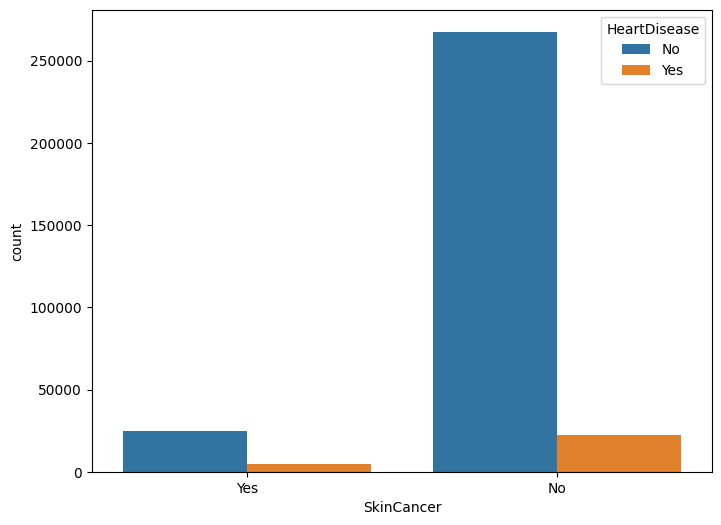

In [150]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="SkinCancer", hue="HeartDisease")

<b>Data Pre-processing</b>

In [151]:
df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [152]:
df['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [153]:
df['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

<b>Convert Categorical Features to Numerical ones</b>

In [154]:
#encoded
df['Smoking']=df['Smoking'].replace(['Yes','No'],[1,0])
     

df['AlcoholDrinking']=df['AlcoholDrinking'].replace(['Yes','No'],[1,0])
     

df['Stroke']=df['Stroke'].replace(['Yes','No'],[1,0])
     

df['DiffWalking']=df['DiffWalking'].replace(['Yes','No'],[1,0])
     

df['Sex']=df['Sex'].replace(['Male','Female'],[1,0])
     

df['AgeCategory']=df['AgeCategory'].replace(['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'],[1,2,3,4,5,6,7,8,9,10,11,12,13])
     

# df['Race']=df['Race'].replace(['White','Hispanic','Black','Asian','American Indian/Alaskan Native','Other'],[1,2,3,4,5,6])
     

df['Diabetic']=df['Diabetic'].replace(['Yes','No','Yes (during pregnancy)','No, borderline diabetes'],[1,0,10,20])
     

df['PhysicalActivity']=df['PhysicalActivity'].replace(['Yes','No'],[1,0])
     

df['GenHealth']=df['GenHealth'].replace(['Poor','Fair','Good','Very good','Excellent'],[1,2,3,4,5])
     

df['Asthma']=df['Asthma'].replace(['Yes','No'],[1,0])
     

df['KidneyDisease']=df['KidneyDisease'].replace(['Yes','No'],[1,0])
     

df['SkinCancer']=df['SkinCancer'].replace(['Yes','No'],[1,0])
     

df['HeartDisease']=df['HeartDisease'].replace(['Yes','No'],[1,0])
     

data_encoded=pd.get_dummies(df)


<b>Correlation of Features</b>

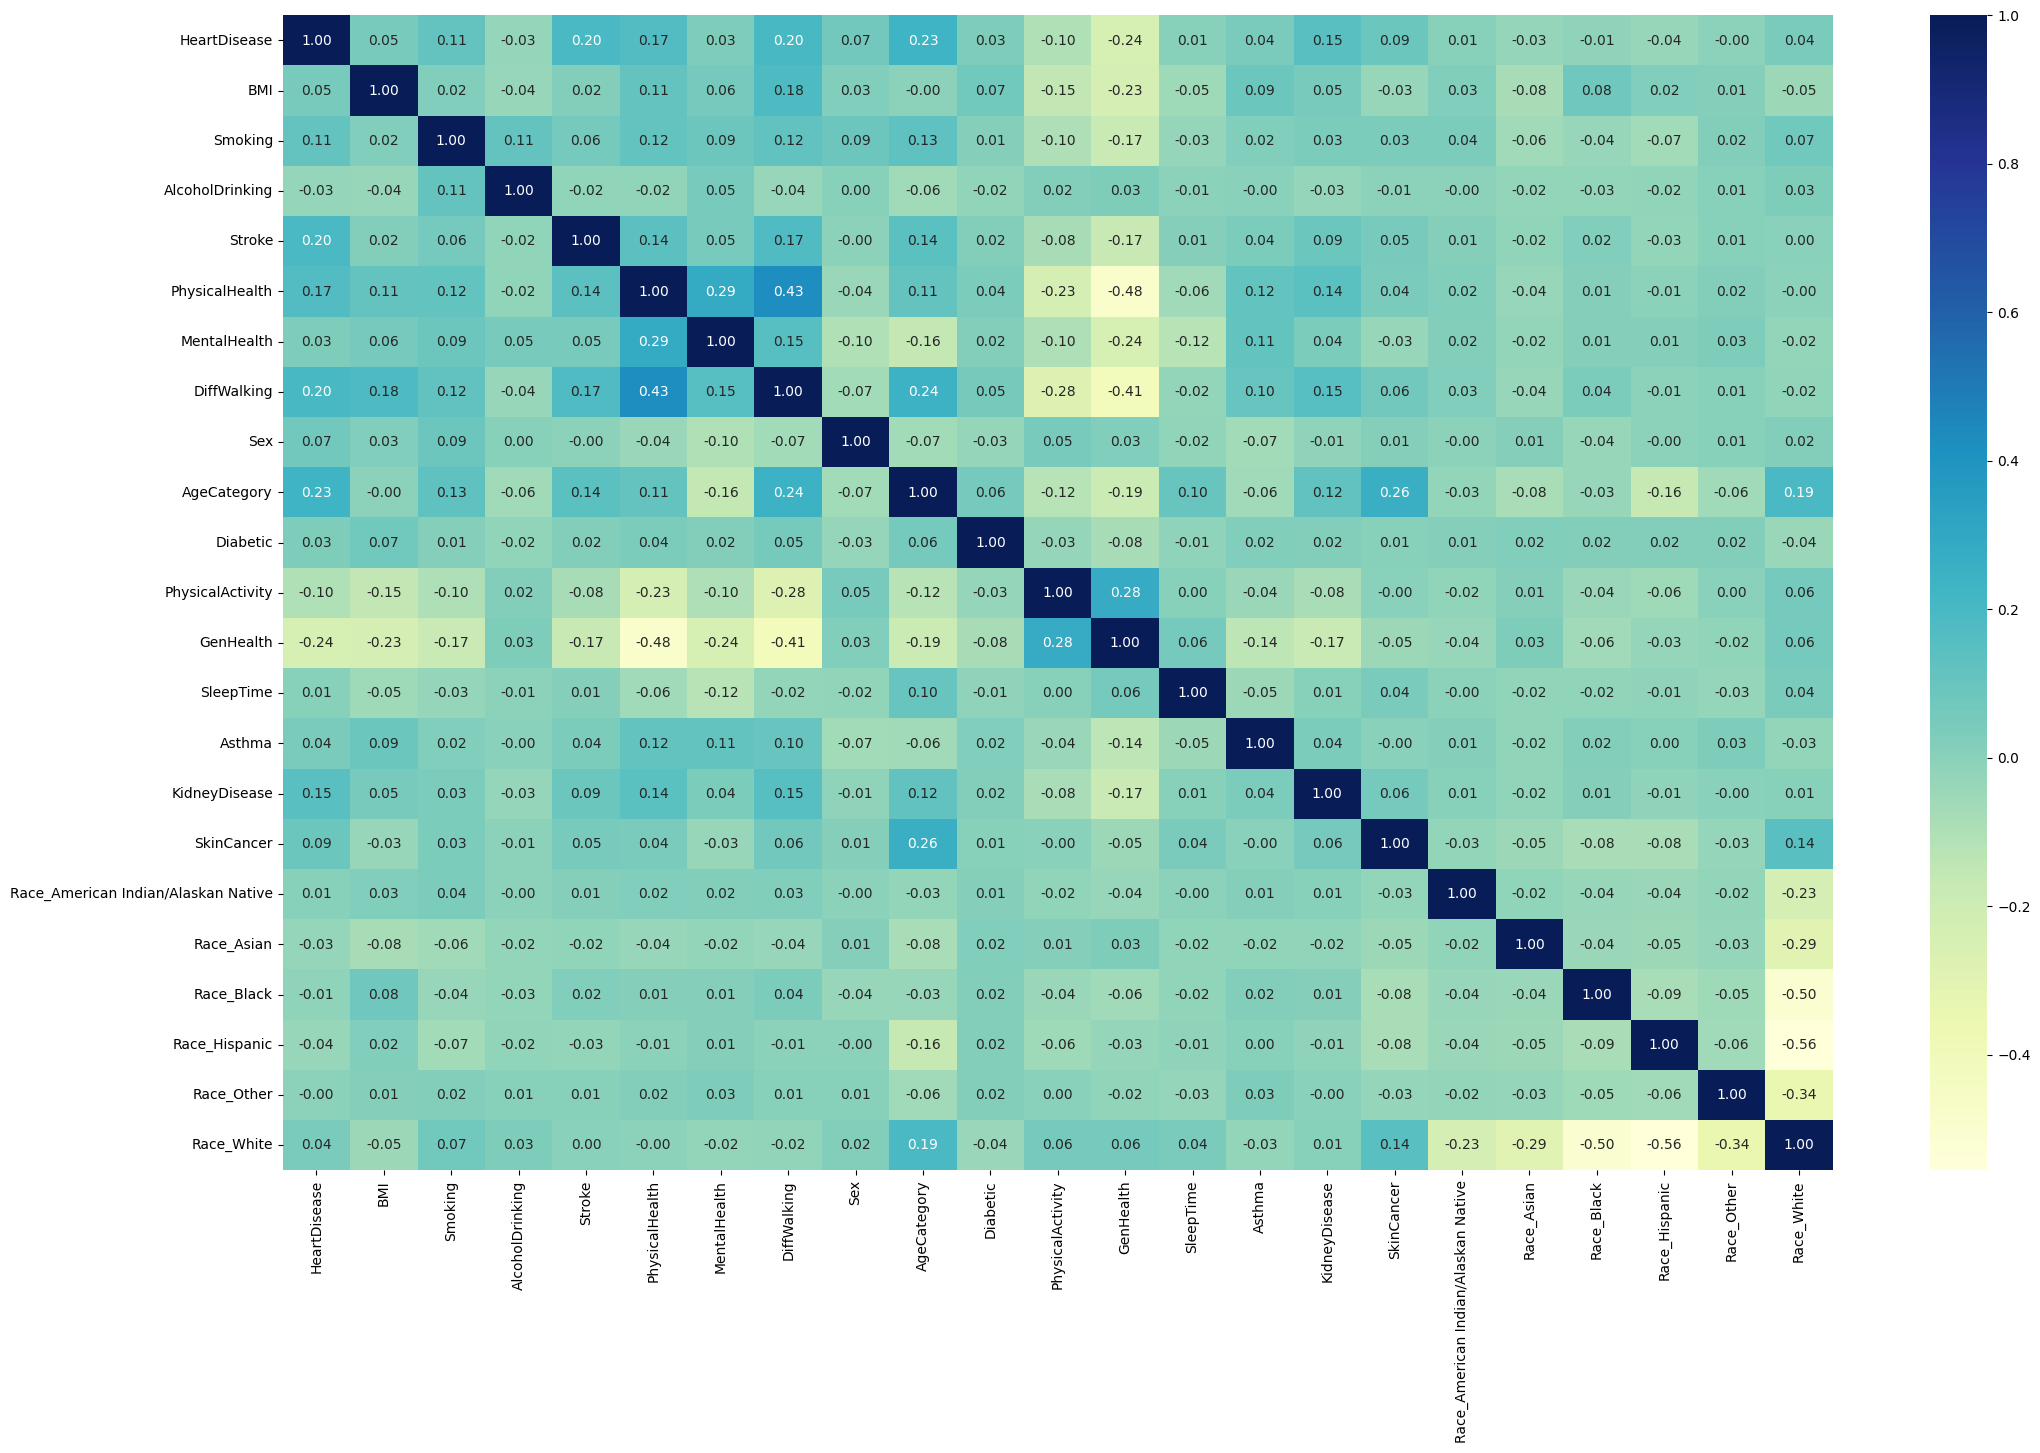

In [155]:
corr= data_encoded.corr()
plt.figure(figsize=(25,15))
cor = data_encoded.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu", fmt='.2f')
plt.show()

<b>Test-Train Split of Input Dataset</b>

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
x = data_encoded.drop(['HeartDisease'], axis=1) 
'''x = encoded data&remove heart desease from feature colums
(data encoded) and put it in y'''
y = data_encoded["HeartDisease"]

<b>MODEL BUILDING
Creating Model for Logistic Regression
We will split our data. 80% of our data will be train data and 20% of it will be test data.</b>

In [158]:
#Step 1: Create training/testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=2)
scaler = StandardScaler() # used for standardizing features. Its main aim is to transform the data so that it has a mean of 0 and a standard deviation of 1.

#Step 2: Normalise training data
normalized_x_train = pd.DataFrame(
    scaler.fit_transform(x_train),
    columns = x_train.columns
)  #The result is a numpy array of the normalized training data.

# Step 3: Normalize testing data
normalized_x_test = pd.DataFrame(
    scaler.fit_transform(x_test),
    columns = x_test.columns
)
y_train=np.expand_dims(y_train, axis=-1)
y_test=np.expand_dims(y_test, axis=-1)
x.shape,normalized_x_train.shape,normalized_x_test.shape, y_train.shape, y_test.shape


((319795, 22), (255836, 22), (63959, 22), (255836, 1), (63959, 1))

In [159]:
#transpose matrices #swap rows with columns  # خطوة مهمة لما اتعامل مع المصفوفات 
normalized_x_train = normalized_x_train.T
y_train = y_train.T
normalized_x_test = normalized_x_test.T
y_test = y_test.T
y_train.shape, y_test.shape

((1, 255836), (1, 63959))

Let's say weight = 0.01 and bias = 0.0

In [160]:
#initialize
def initialize(dimension): # dimension represents the number of features in the input data.
#create a weight matrix with dimensions (dimension, 1) and fill it with the value 0.01
    weight = np.full((dimension,1),0.01) # matrix with0.01 values
    bias = 0.0
    return weight,bias
     

<b>Sigmoid Function</b>

In [161]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head   # returning the corresponding output value between 0 and 1. 

In [162]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    ''' computing the dot product of the weight matrix weight
      and the transposed input training data x_train, adding 
      the bias bias, and applying the sigmoid activation function using the sigmoid function'''
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head)) #loss fun for logistic
    cost = np.sum(loss) / x_train.shape[1] #shape[1];برجع عدد الاعمدة# average cost
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    #The derivatives of the weight and bias are stored in a dictionary called gradients
    return cost,gradients
     

In [163]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients
     

In [164]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [179]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))
    '''logistic_regression function performs logistic regression by initializing the parameters,
       updating them using the training data, and making predictions using the testing data.
       It then evaluates the accuracy of the model and prints it as the "Manual Test Accuracy in percentage format".'''

iteration: 90
cost: 0.22879050705868317


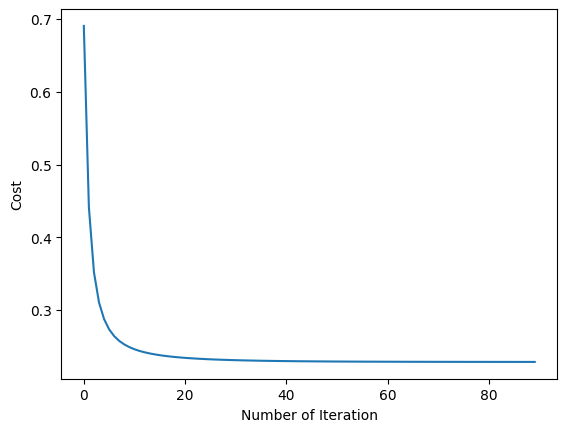

Manuel Test Accuracy: 91.54%


In [166]:
logistic_regression(normalized_x_train,y_train,normalized_x_test,y_test,1.7,90) 
#give learning rate and num of iterations

In [167]:
# print accurecy for several machine learning models
# Create a Logistic Regression Model and Train It
lin_model = LogisticRegression(solver='lbfgs')
lin_model.fit(normalized_x_train.T, y_train.T)
print("Linear Model Accuracy: ", lin_model.score(normalized_x_test.T, y_test.T))

# Create a Gaussian Naive Bayes Model and Train It

nb_model = GaussianNB()
nb_model.fit(normalized_x_train.T, y_train.T)
print("Naive Bayes Model Accuracy: ", nb_model.score(normalized_x_test.T, y_test.T))

# Create a Decision Tree Model and Train It

tree_model = DecisionTreeClassifier()
tree_model.fit(normalized_x_train.T, y_train.T)
print("Decision Tree Model Accuracy: ", tree_model.score(normalized_x_test.T, y_test.T))

# Create a Random Forest Model and Train It

forest_model = RandomForestClassifier(n_estimators=100)
forest_model.fit(normalized_x_train.T, y_train.T)
print("Random Forest Model Accuracy: ", forest_model.score(normalized_x_test.T, y_test.T))

# Create a KNeighbors Model and Train It

knn_model = KNeighborsClassifier()
knn_model.fit(normalized_x_train.T, y_train.T)
print("K Nearest Neighbor Model Accuracy: ", knn_model.score(normalized_x_test.T, y_test.T))

# svm_model = SVC(gamma='auto')
# svm_model.fit(normalized_x_train.T, y_train.T)
# print("Support Vector Machine Model Accuracy: ", svm_model.score(normalized_x_test.T, y_test.T))


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear Model Accuracy:  0.9153676574055254


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes Model Accuracy:  0.8367078909926672
Decision Tree Model Accuracy:  0.8644913147485108


C:\Users\user\AppData\Local\Temp\ipykernel_40084\335027314.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(normalized_x_train.T, y_train.T)


Random Forest Model Accuracy:  0.9059866476961803


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K Nearest Neighbor Model Accuracy:  0.9067996685376569


In [168]:
models_fited = {"lr": lin_model,
                "nb":nb_model,
                "tree":tree_model,
                "forest":forest_model,
                "knn":knn_model
                }
''' creates a dictionary called models
 fitted that contains the fitted machine 
 learning models. Each model is assigned 
 a key that represents its name or abbreviation  ''' 

' creates a dictionary called models\n fitted that contains the fitted machine \n learning models. Each model is assigned \n a key that represents its name or abbreviation  '

<b>Confusion Matrix</b>

In [169]:
# Predicted values
y_head_lr = lin_model.predict(normalized_x_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(normalized_x_train.T, y_train.T)
y_head_knn = knn3.predict(normalized_x_test.T)
# y_head_svm = svm_model.predict(x_test.T)
y_head_nb = nb_model.predict(normalized_x_test.T)
y_head_dtc = tree_model.predict(normalized_x_test.T)
y_head_rf = forest_model.predict(normalized_x_test.T)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [170]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test.T,y_head_lr)
cm_knn = confusion_matrix(y_test.T,y_head_knn)
cm_nb = confusion_matrix(y_test.T,y_head_nb)
cm_dtc = confusion_matrix(y_test.T,y_head_dtc)
cm_rf = confusion_matrix(y_test.T,y_head_rf)
'''The confusion matrix provides information about the performance of a classification model. 
It displays the number of true positives, true negatives, false positives, and false negatives,
 allowing us to evaluate the model's accuracy, precision, recall, and other performance metrics.'''

"The confusion matrix provides information about the performance of a classification model. \nIt displays the number of true positives, true negatives, false positives, and false negatives,\n allowing us to evaluate the model's accuracy, precision, recall, and other performance metrics."

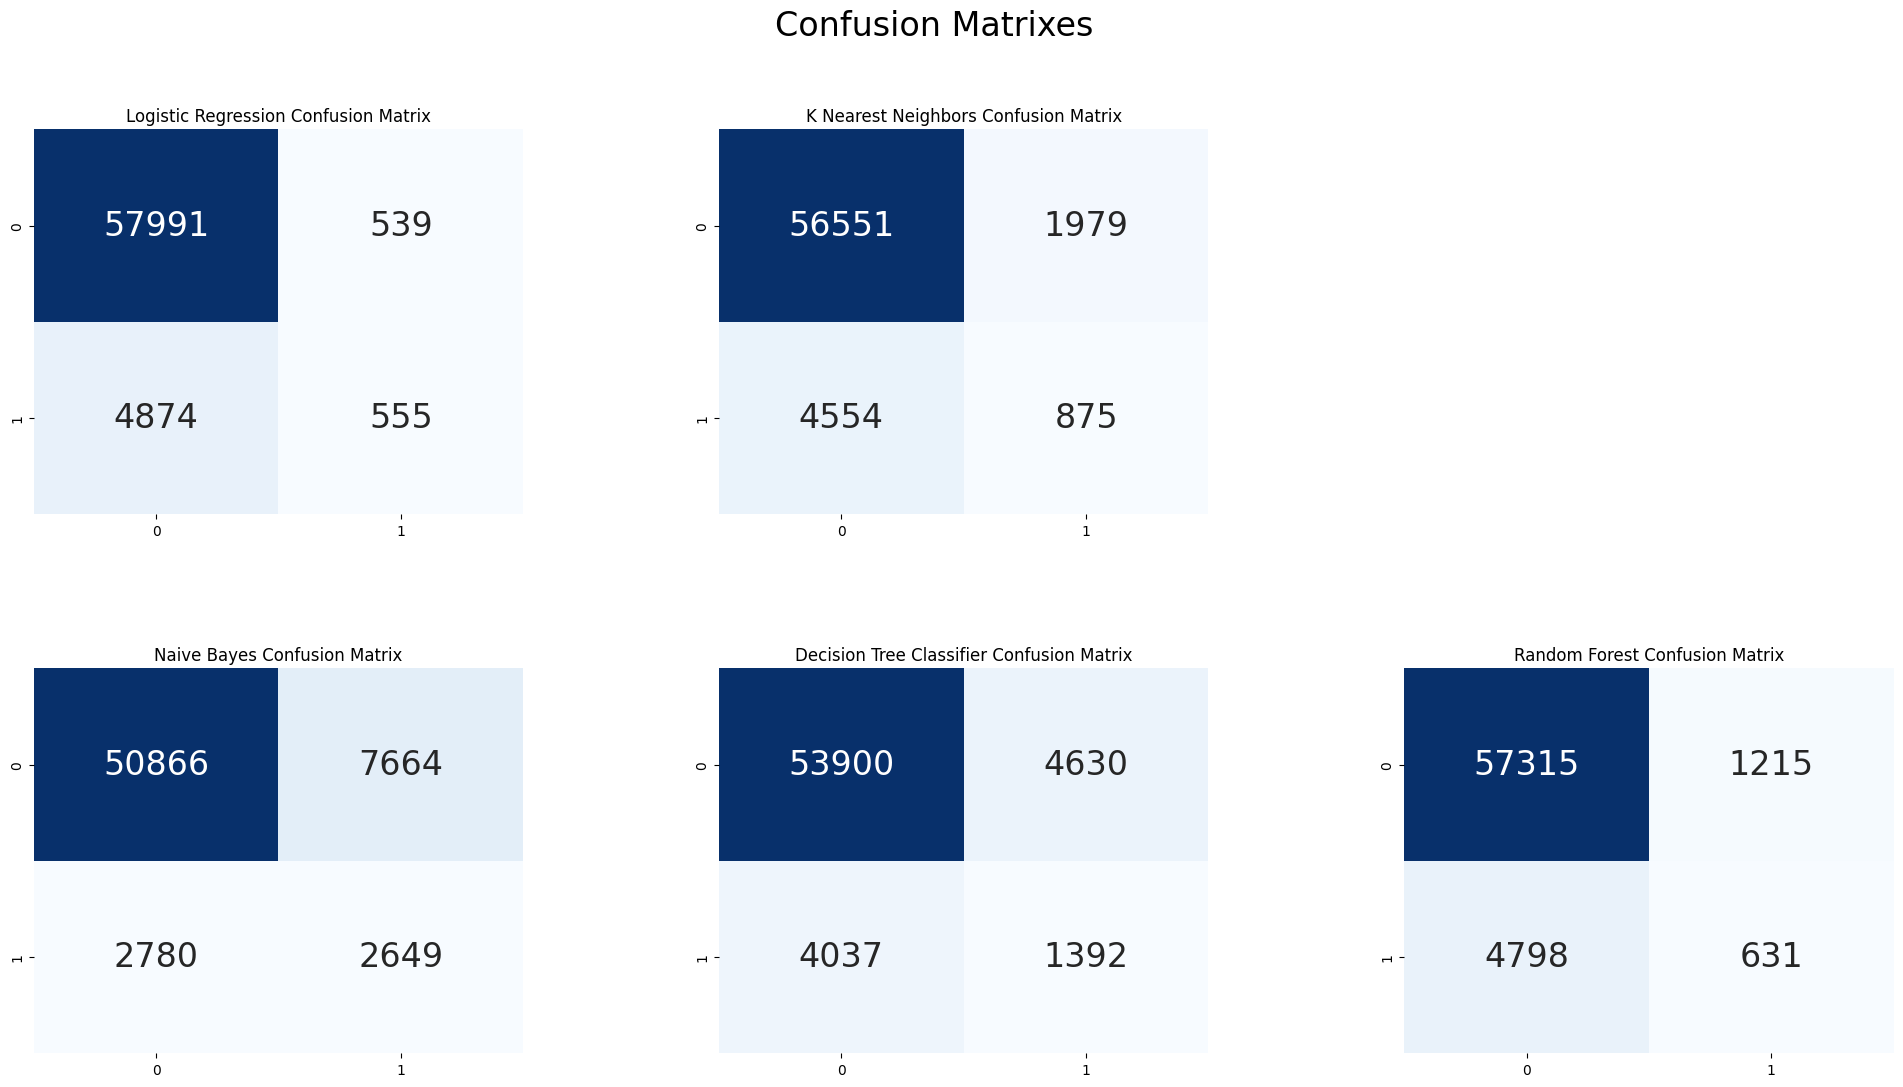

In [171]:

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# plt.subplot(2,3,3)
# plt.title("Support Vector Machine Confusion Matrix")
# sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

<b>Adaboost Classifier</b>

In [172]:
from sklearn.ensemble import AdaBoostClassifier
# Put models in a dictionary

models = {"AdaBoost": AdaBoostClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

'''combines multiple weak classifiers to create a strong classifier
 used for binary classification problems, where the target variable has two classes.
 '''    

In [178]:
model_scores = fit_and_score(models=models,
                             X_train=normalized_x_train.T,
                             X_test=normalized_x_test.T,
                             y_train=y_train.squeeze(),
                             y_test=y_test.squeeze())
model_scores


{'AdaBoost': 0.9157116277615347}

In [174]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test.T,y_head_lr) # Accuracy for linear regression


array([[57991,   539],
       [ 4874,   555]], dtype=int64)

In [175]:
from sklearn.metrics import recall_score
recall_score(y_test.T,y_head_lr, average=None) # Recall for lr

array([0.99079105, 0.10222877])

In [176]:
from sklearn.metrics import precision_score             
precision_score(y_test.T,y_head_lr, average=None)# Precision for lr

array([0.92246878, 0.50731261])

lr: Accuracy =
0.9153676574055254
 Recall =
[0.99079105 0.10222877]
 Precision =
[0.92246878 0.50731261]


nb: Accuracy =
0.8367078909926672
 Recall =
[0.8690586  0.48793516]
 Precision =
[0.92246878 0.50731261]


tree: Accuracy =
0.8647727450397911
 Recall =
[0.92089527 0.25971634]
 Precision =
[0.92246878 0.50731261]


forest: Accuracy =
0.9066902234243812
 Recall =
[0.97961729 0.12046417]
 Precision =
[0.92246878 0.50731261]


knn: Accuracy =
0.9067527634891102
 Recall =
[0.97819921 0.13648922]
 Precision =
[0.92246878 0.50731261]
